In [1]:
#importing the required packages
import pandas as pd #To manupulate the data and import the dataset
import numpy as np  #to perform the algebra
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans

In [2]:
Data=pd.read_csv(r"C:\Users\admin\Downloads\McDonalds Case Study-20250517T084903Z-1-001\McDonalds Case Study\mcdonalds.csv")
Data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
#Data Cleaning/Preprocessing
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
Data["Like"]=Data["Like"].str.extract(r'(-?\d+)')
Data["Like"]=pd.to_numeric(Data["Like"], errors='coerce')

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(2), object(13)
memory usage: 170.4+ KB


In [6]:
Data.describe()

,Like,Age
count,1453.000000,1453.000000
mean,0.777013,44.604955
std,3.116842,14.221178
min,-5.000000,18.000000
25%,-1.000000,33.000000
50%,1.000000,45.000000
75%,3.000000,57.000000
max,5.000000,71.000000


In [7]:
Data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

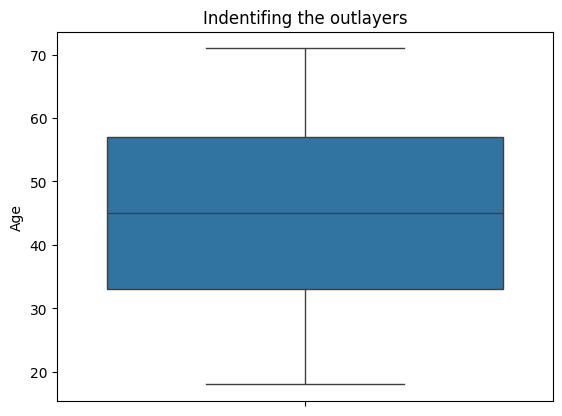

In [8]:
#checking the outlayers
sns.boxplot(Data['Age'])
plt.title("Indentifing the outlayers")
plt.show()

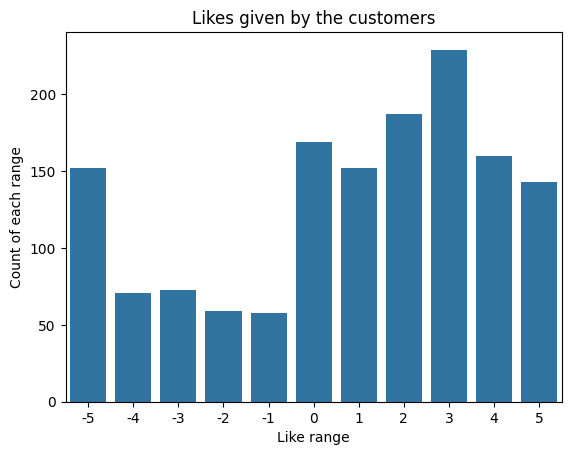

In [9]:
Like_counts=Data['Like'].value_counts().sort_index()
sns.barplot(x=Like_counts.index,y=Like_counts.values)
plt.title("Likes given by the customers")
plt.xlabel("Like range")
plt.ylabel("Count of each range")
plt.show()

<BarContainer object of 2 artists>

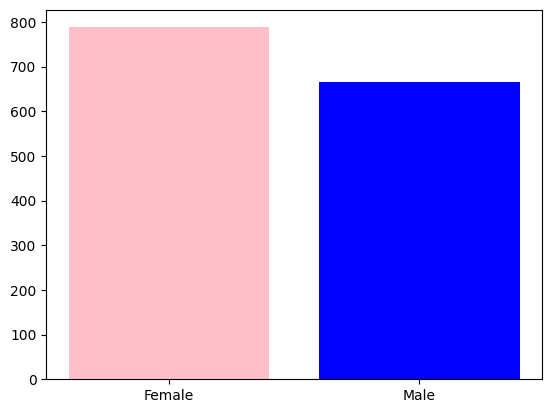

In [10]:
gender=Data['Gender'].value_counts().sort_index()
plt.bar(x=gender.index,height=gender.values,color=['pink','blue'])

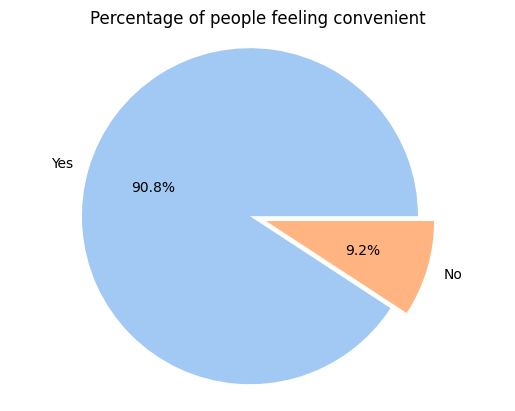

In [11]:
Values=Data['convenient'].value_counts()
plt.pie(Values,
        labels=Values.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("pastel"),
        startangle=360,
        explode=[0.05,0.05]
       )
plt.title('Percentage of people feeling convenient')
plt.axis('equal') 
plt.show()

In [12]:
#encoding the data
scaler=StandardScaler()
Encoded_Data=pd.get_dummies(Data,columns=['convenient','spicy','fattening','greasy','fast','cheap','tasty',
                                          'expensive','healthy','disgusting','Gender'],drop_first=False)
#scaling the age
# Encoded_Data[['Age']]=scaler.fit_transform(Encoded_Data[["Age"]])
Encoded_Data.drop(['yummy'],axis=1)
Encoded_Data=Encoded_Data.drop(['yummy'],axis=1)
#ordinal encoder for VisitFrequency
frequency_order=[['Never','Once a year','Every three months','Once a month','Once a week','More than once a week']]
Ordinal_enc=OrdinalEncoder(categories=frequency_order)
Encoded_Data['VisitFrequency']=Ordinal_enc.fit_transform(Encoded_Data[['VisitFrequency']])

In [13]:
Encoded_Data

,Like,Age,VisitFrequency,convenient_No,convenient_Yes,spicy_No,spicy_Yes,fattening_No,fattening_Yes,greasy_No,...,tasty_No,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Gender_Female,Gender_Male
0,-3,61,2.0,0,1,1,0,0,1,1,...,1,0,0,1,1,0,1,0,1,0
1,2,51,2.0,0,1,1,0,0,1,0,...,0,1,0,1,1,0,1,0,1,0
2,1,62,2.0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
3,4,69,4.0,0,1,1,0,0,1,0,...,0,1,1,0,1,0,0,1,1,0
4,2,49,3.0,0,1,1,0,0,1,0,...,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-5,47,1.0,0,1,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
1449,2,36,4.0,0,1,1,0,0,1,1,...,0,1,1,0,0,1,1,0,1,0
1450,3,52,3.0,0,1,1,0,0,1,1,...,0,1,0,1,1,0,1,0,1,0
1451,4,41,2.0,0,1,1,0,1,0,1,...,0,1,1,0,0,1,1,0,0,1


In [14]:
#Performing the pca to reduse the dimentiality
from sklearn.decomposition import PCA
scaled_data=scaler.fit_transform(Encoded_Data)
pca=PCA(n_components=2)
pca_data=pca.fit_transform(scaled_data)

In [15]:
pca_df=pd.DataFrame(pca_data, columns=['PC1','PC2'])

In [16]:
#Modeling

In [17]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
print(wcss)

[13039.400176637408, 7596.2485345853365, 4866.955788587944, 3194.087258545422, 2480.1439286188543, 2101.628702944101, 1770.6738904073168, 1546.2849816082967, 1391.7498859464508, 1229.715178090613]


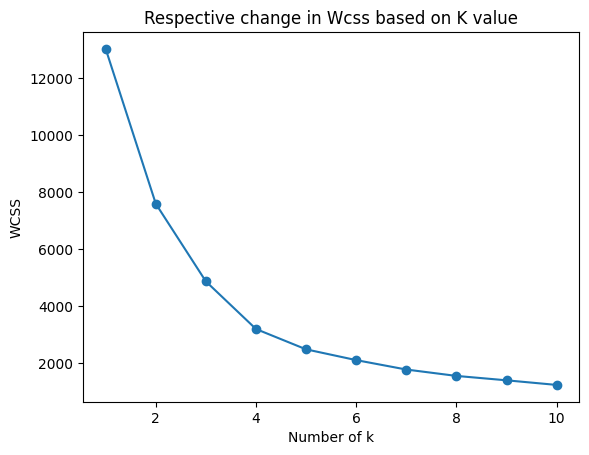

In [18]:
#Elbow method
plt.plot(range(1,11),wcss, marker='o')
plt.xlabel("Number of k")
plt.ylabel("WCSS")
plt.title("Respective change in Wcss based on K value")
plt.show()

In [19]:
Model=KMeans(n_clusters=4,init='k-means++',random_state=45)
Model.fit(pca_data)
y_kmeans=Model.predict(pca_data)

In [20]:
Encoded_Data['Cluster']=pd.DataFrame(y_kmeans)
Encoded_Data

,Like,Age,VisitFrequency,convenient_No,convenient_Yes,spicy_No,spicy_Yes,fattening_No,fattening_Yes,greasy_No,...,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Gender_Female,Gender_Male,Cluster
0,-3,61,2.0,0,1,1,0,0,1,1,...,0,0,1,1,0,1,0,1,0,1
1,2,51,2.0,0,1,1,0,0,1,0,...,1,0,1,1,0,1,0,1,0,0
2,1,62,2.0,0,1,0,1,0,1,0,...,1,0,1,0,1,1,0,1,0,2
3,4,69,4.0,0,1,1,0,0,1,0,...,1,1,0,1,0,0,1,1,0,1
4,2,49,3.0,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-5,47,1.0,0,1,1,0,0,1,0,...,0,0,1,1,0,0,1,0,1,3
1449,2,36,4.0,0,1,1,0,0,1,1,...,1,1,0,0,1,1,0,1,0,0
1450,3,52,3.0,0,1,1,0,0,1,1,...,1,0,1,1,0,1,0,1,0,2
1451,4,41,2.0,0,1,1,0,1,0,1,...,1,1,0,0,1,1,0,0,1,0


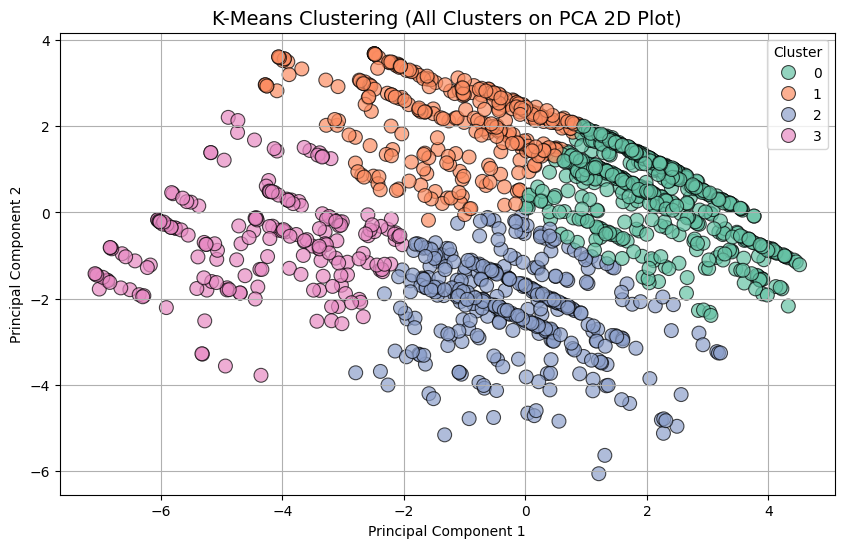

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with PCA components and cluster labels
pca_df['Cluster'] = y_kmeans  # from KMeans prediction

# Plot all clusters in one plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2',
    s=100,
    alpha=0.7,
    edgecolor='black'
)
plt.title("K-Means Clustering (All Clusters on PCA 2D Plot)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


In [22]:
#profiling the segments

In [23]:
features=Encoded_Data.drop(['Cluster'],axis=1)
Scaled_features=pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
Scaled_features['Cluster']=Encoded_Data['Cluster']

In [24]:
Scaled_features

,Like,Age,VisitFrequency,convenient_No,convenient_Yes,spicy_No,spicy_Yes,fattening_No,fattening_Yes,greasy_No,...,tasty_Yes,expensive_No,expensive_Yes,healthy_No,healthy_Yes,disgusting_No,disgusting_Yes,Gender_Female,Gender_Male,Cluster
0,-1.212225,1.153258,-0.296582,-0.318735,0.318735,0.321349,-0.321349,-0.391375,0.391375,1.054476,...,-1.345528,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,0.918645,-0.918645,1
1,0.392515,0.449839,-0.296582,-0.318735,0.318735,0.321349,-0.321349,-0.391375,0.391375,-0.948339,...,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,0.918645,-0.918645,0
2,0.071567,1.223600,-0.296582,-0.318735,0.318735,-3.111884,3.111884,-0.391375,0.391375,-0.948339,...,0.743203,-1.339489,1.339489,-2.006908,2.006908,0.566488,-0.566488,0.918645,-0.918645,2
3,1.034411,1.715993,1.250756,-0.318735,0.318735,0.321349,-0.321349,-0.391375,0.391375,-0.948339,...,0.743203,0.746553,-0.746553,0.498279,-0.498279,-1.765261,1.765261,0.918645,-0.918645,1
4,0.392515,0.309156,0.477087,-0.318735,0.318735,0.321349,-0.321349,-0.391375,0.391375,-0.948339,...,-1.345528,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,-1.088560,1.088560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.854121,0.168472,-1.070251,-0.318735,0.318735,0.321349,-0.321349,-0.391375,0.391375,-0.948339,...,-1.345528,-1.339489,1.339489,0.498279,-0.498279,-1.765261,1.765261,-1.088560,1.088560,3
1449,0.392515,-0.605289,1.250756,-0.318735,0.318735,0.321349,-0.321349,-0.391375,0.391375,1.054476,...,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,0.918645,-0.918645,0
1450,0.713463,0.520181,0.477087,-0.318735,0.318735,0.321349,-0.321349,-0.391375,0.391375,1.054476,...,0.743203,-1.339489,1.339489,0.498279,-0.498279,0.566488,-0.566488,0.918645,-0.918645,2
1451,1.034411,-0.253579,-0.296582,-0.318735,0.318735,0.321349,-0.321349,2.555092,-2.555092,1.054476,...,0.743203,0.746553,-0.746553,-2.006908,2.006908,0.566488,-0.566488,-1.088560,1.088560,0


In [25]:
Cluster_profile=pd.DataFrame(Scaled_features.groupby('Cluster').mean().T)

In [26]:
Cluster_profile

Cluster,0,1,2,3
Like,0.591040,-0.790851,0.399511,-1.265165
Age,-0.075428,0.212492,-0.143946,0.159045
VisitFrequency,0.462464,-0.725844,0.363250,-0.914720
convenient_No,-0.289043,0.049176,-0.196311,1.159921
convenient_Yes,0.289043,-0.049176,0.196311,-1.159921
spicy_No,0.008700,0.055550,-0.108975,0.091287
spicy_Yes,-0.008700,-0.055550,0.108975,-0.091287
fattening_No,0.185768,-0.315337,0.090336,-0.224308
fattening_Yes,-0.185768,0.315337,-0.090336,0.224308
greasy_No,0.366223,-0.450866,0.126741,-0.617978


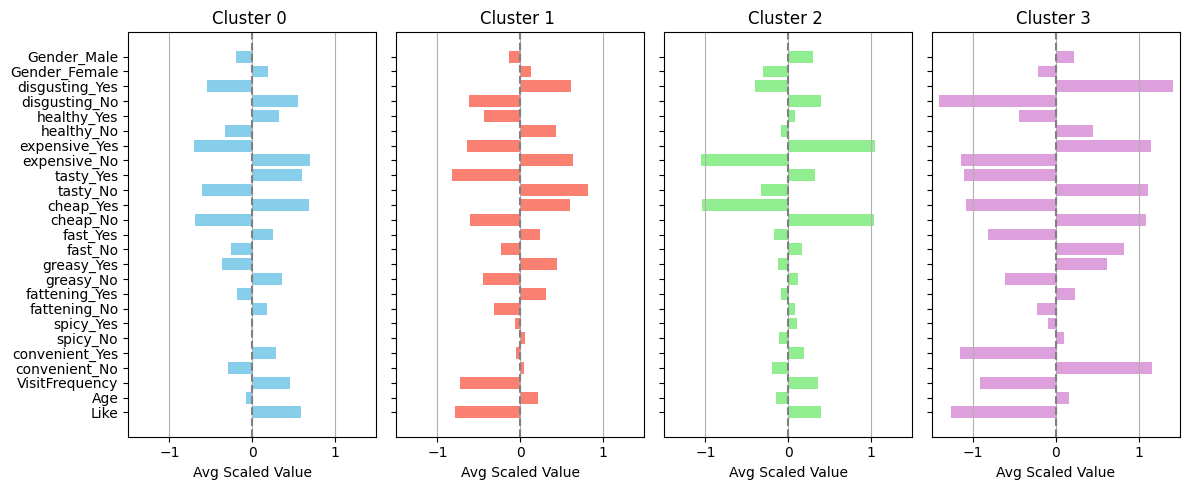

In [27]:
features = Cluster_profile.index
colors = ['skyblue', 'salmon', 'lightgreen', 'plum']  # Customize as needed

fig,axes= plt.subplots(nrows=1, ncols=4, figsize=(3* 4, 5), sharey=True)

for i, cluster in enumerate(Cluster_profile.columns):
    ax = axes[i]
    ax.barh(features, Cluster_profile[cluster], color=colors[i])
    ax.set_title(f'Cluster {cluster} ')
    ax.set_xlabel('Avg Scaled Value')
    ax.axvline(x=0, color='gray', linestyle='--')  # Reference line at 0
    ax.grid(True, axis='x')
    ax.set_xlim(-1.5, 1.5)  # Adjust based on your data
    ax.invert_yaxis()  # To keep the top features at the top

plt.tight_layout()
plt.show()
